In [3]:
from models.ICA_EM import *
from models.source_estimator import *
from models.dgp import *
from models.metrics import *
import importlib, sys
importlib.reload(sys.modules['models.ICA_EM'])
importlib.reload(sys.modules['models.dgp'])
importlib.reload(sys.modules['models.metrics'])
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as mse
def norm_funtion(A):
    # [0,0], [1,1] must be one
    A_0 = A[:, 0]/A[0,0]
    return A_0

In [4]:
n = 10000
J = 6
I = 5

In [4]:
# compare VarEM with CausalVarEM

treatmet_true = []
treatment_causal_perm = []
score_causal = []
treatment_causal_first_column = []
mse_causal = []
likelihood_score_causal = []

data = dgp(prior={"loc" : 0, "scale" : 3} ,noise_dict={"loc" : 0, "scale" : 0})

for i in tqdm.tqdm(range(100)):
    data.generate_data(n,I,J, random_state=i)
    estimator_Causal = CausalVarEM(update_sigma=False,   true_A= data.mixing_matrix_observed, tol=1e-4, max_iter=200, random_seed=i, mode = "each")
    estimator_Causal.fit(data.data_observed, J = J, progress_bar=False)
    best_perm, score = f_score(data.mixing_matrix_observed, estimator_Causal.A)    
    score_causal.append(score)
    treatmet_true.append(data.treatment_effect)
    treatment_causal_perm.append(norm_funtion(estimator_Causal.A[:,best_perm])[1])
    treatment_causal_first_column.append(norm_funtion(estimator_Causal.A)[1])
    mse_causal.append(mean_squared_error(data.signals, estimator_Causal.Signals[:, best_perm]))
    likelihood_score_causal.append(likelihood_score(data.signals, estimator_Causal.Signals[:, best_perm]))

100%|██████████| 100/100 [1:14:24<00:00, 44.64s/it]


In [5]:
result = pd.DataFrame(
    {
        "treatmet_true": treatmet_true,
        "treatment_causal_perm": treatment_causal_perm,
        "score_causal": score_causal,
        "treatment_causal_first_column": treatment_causal_first_column,
        "mse_causal": mse_causal,
        "likelihood_score_causal": likelihood_score_causal,
    }
)
#result.to_csv("results/different_scales_CausalVarEM.csv", index=False)

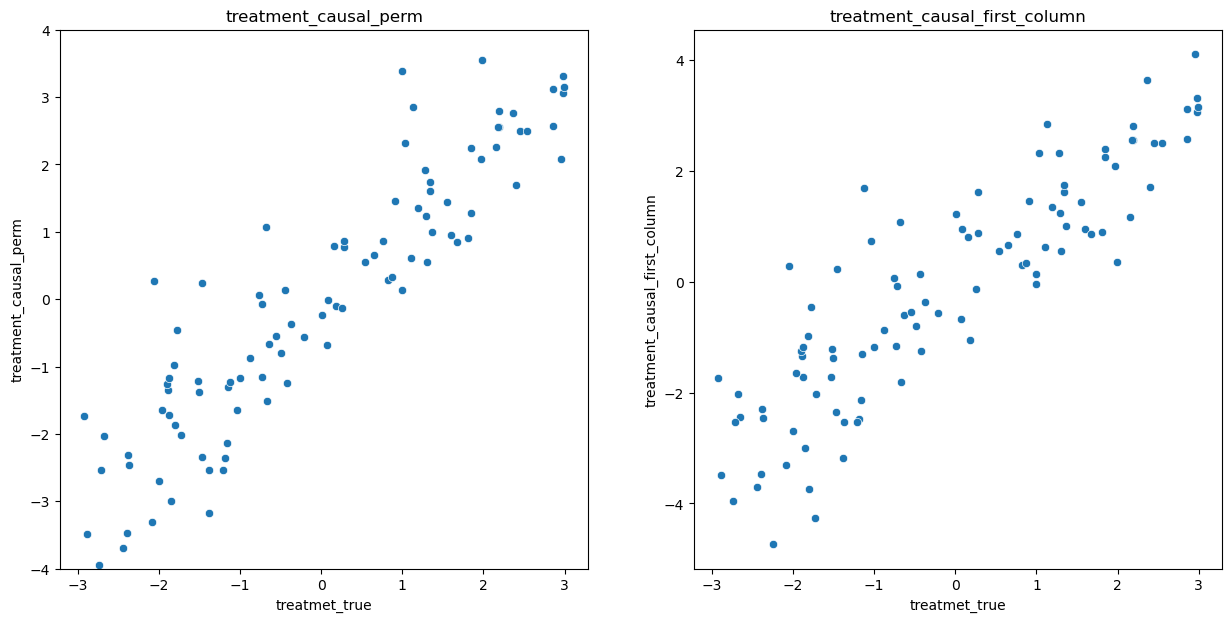

In [5]:
result = pd.read_csv("results/different_scales_CausalVarEM.csv")    

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.scatterplot(data=result, x="treatmet_true", y="treatment_causal_perm", ax=ax[0])
sns.scatterplot(data=result, x="treatmet_true", y="treatment_causal_first_column", ax=ax[1])
ax[0].set_title("treatment_causal_perm")
ax[0].set_ylim(-4,4)
ax[1].set_title("treatment_causal_first_column")
plt.show()


In [6]:
print(mse(result.treatmet_true, result.treatment_causal_first_column))
print(np.std(result.treatmet_true-result.treatment_causal_first_column))


0.9309524242650958
0.9643581856174821


In [8]:
print(result.mean())
print(result.std())

treatmet_true                       -0.098014
treatment_causal_perm               -0.825837
score_causal                         0.321480
treatment_causal_first_column       -0.129090
mse_causal                          20.814122
likelihood_score_causal         -40952.960118
dtype: float64
treatmet_true                       1.720049
treatment_causal_perm               6.379361
score_causal                        0.154564
treatment_causal_first_column       2.052473
mse_causal                          4.459544
likelihood_score_causal          5883.040100
dtype: float64
